In [2]:
import os
import pandas as pd
from newsapi.newsapi_client import NewsApiClient
from datetime import date, datetime, timedelta
import os
from dotenv import load_dotenv


%matplotlib inline

In [3]:
import nltk
nltk.download('vader_lexicon')
  

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\costa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
# Load .env enviroment variables
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")



In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
#newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])


In [10]:
# Fetch the Bitcoin news articles

articles_bit = newsapi.get_everything(
            q='bitcoin',
            language="en", 
            from_param='2020-05-04',
            to='2020-06-04',
            
            )
                                     
articles_bit["totalResults"]


3662

In [11]:
# Fetch the Ethereum news articles

articles_eth= newsapi.get_everything(
            q='ethereum',
            language="en",
            sort_by="relevancy",
            page=1,
            )
articles_eth['totalResults']

887

In [12]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in articles_bit["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bit_df = pd.DataFrame(bitcoin_sentiments)
# Reorder DataFrame columns
cols = ["date", "compound", "negative", "neutral","positive", "text"]
bit_df = bit_df[cols]

bit_df.head(20)


,date,compound,negative,neutral,positive,text
0,2020-05-16,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...
1,2020-05-08,0.3182,0.000,0.933,0.067,"Yesterday, the prominent bitcoin investor Mich..."
2,2020-05-08,0.2716,0.000,0.939,0.061,"Early next week, Bitcoin is about to experienc..."
3,2020-05-13,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...
4,2020-06-04,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...
5,2020-05-11,-0.5859,0.134,0.866,0.000,Since the first Bitcoin block was generated ba...
6,2020-05-08,0.0772,0.058,0.877,0.066,<ul><li>The cryptocurrency market added $13 bi...
7,2020-05-28,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
8,2020-06-02,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...
9,2020-05-25,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...


In [13]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in articles_eth["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)
# Reorder DataFrame columns
cols = ["date", "compound", "negative", "neutral","positive", "text"]
eth_df = eth_df[cols]
eth_df.head()

,date,compound,negative,neutral,positive,text
0,2020-05-20,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...
1,2020-06-03,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...
2,2020-05-14,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...
3,2020-05-24,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou..."
4,2020-05-12,0.0000,0.148,0.703,0.148,With unemployment surging and businesses strug...


In [14]:
# Describe the Bitcoin Sentiment
bit_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.253084,0.024947,0.903368,0.071632
std,0.398747,0.046209,0.050314,0.051823
min,-0.585900,0.000000,0.812000,0.000000
25%,0.000000,0.000000,0.878000,0.044000
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.029000,0.920000,0.090000
max,0.801600,0.134000,1.000000,0.188000


In [15]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,negative,neutral,positive
count,16.000000,16.000000,16.000000,16.000000
mean,0.126394,0.039125,0.883250,0.077500
std,0.447050,0.065865,0.112562,0.097501
min,-0.807400,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.838500,0.000000
50%,0.000000,0.000000,0.883500,0.049500
75%,0.381625,0.063000,1.000000,0.121500
max,0.919800,0.223000,1.000000,0.335000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score.  Score = .088188

Q: Which coin had the highest compound score?

A: Ethereum has the highest max compound score of .9198 while bit coin has 
    a higher mean compound score. 

Q. Which coin had the highest positive score?

A: Ethereum has the highest max positive score of .335

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Expand the default stopwords list if necessary

nltk.download("stopwords")
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
# Complete the tokenizer function
nltk.download("punkt")
lemmatizer = WordNetLemmatizer()
   
# Create a list of the words
all_articles = []

for article in articles_bit["articles"]:
    sentences=article["content"]  
    all_articles.append(sentences)

"""Tokenizes text."""
def tokenizer(all_articles):
    words_tokenized = []
    for article in all_articles:
        article = str(article)
        sw = set(stopwords.words('english'))
        regex = re.compile("[^a-zA-Z ]")
        re_clean = regex.sub('', article)
        words = word_tokenize(re_clean)
        lem = [lemmatizer.lemmatize(word) for word in words]
        output = [word.lower() for word in lem if word.lower() not in sw]
        words_tokenized.append(output)
    #print(words_tokenized)
    return words_tokenized

processed = tokenizer(all_articles)
processed.pop(6)


all_articles_eth = []

for article in articles_eth["articles"]:
    sentences=article["content"]  
    all_articles_eth.append(sentences)

processed_eth = tokenizer(all_articles_eth)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\costa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
# Create a new tokens column for bitcoin
bit_df["tokens"] = processed
bit_df.head()

,date,compound,negative,neutral,positive,text,tokens
0,2020-05-16,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...,"[jk, rowling, ha, drinking, lot, youd, better,..."
1,2020-05-08,0.3182,0.000,0.933,0.067,"Yesterday, the prominent bitcoin investor Mich...","[yesterday, prominent, bitcoin, investor, mich..."
2,2020-05-08,0.2716,0.000,0.939,0.061,"Early next week, Bitcoin is about to experienc...","[early, next, week, bitcoin, experience, third..."
3,2020-05-13,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...,"[last, week, eye, crypto, world, glued, halven..."
4,2020-06-04,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."


In [20]:


#remove rows with none values
processed_eth.pop(7)
processed_eth.pop(8)
processed_eth.pop(8)
processed_eth.pop(10)

# Create a new tokens column for ethereum
eth_df["tokens"] = processed_eth
eth_df.head()


,date,compound,negative,neutral,positive,text,tokens
0,2020-05-20,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...,"[editors, noteandreessen, horowitzs, crypto, s..."
1,2020-06-03,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
2,2020-05-14,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...,"[use, send, ether, one, account, another, smar..."
3,2020-05-24,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou...","[opensource, group, linux, foundation, deal, o..."
4,2020-05-12,0.0000,0.148,0.703,0.148,With unemployment surging and businesses strug...,"[unemployment, surging, business, struggling, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [21]:
from collections import Counter
from nltk import ngrams

In [22]:
# Generate the Bitcoin N-grams where N=2


words_bit = []
for list in processed:
    for word in list:
        words_bit.append(word)


bigram_counts = Counter(ngrams(words_bit, n=2))
print(dict(bigram_counts))

{('jk', 'rowling'): 1, ('rowling', 'ha'): 1, ('ha', 'drinking'): 1, ('drinking', 'lot'): 1, ('lot', 'youd'): 1, ('youd', 'better'): 1, ('better', 'believe'): 1, ('believe', 'ha'): 1, ('ha', 'thought'): 1, ('thought', 'bitcoinnotedterf'): 1, ('bitcoinnotedterf', 'author'): 1, ('author', 'cuckoos'): 1, ('cuckoos', 'calling'): 1, ('calling', 'rowlingdecided'): 1, ('rowlingdecided', 'friday'): 1, ('friday', 'wa'): 1, ('wa', 'perfect'): 1, ('perfect', 'time'): 1, ('time', 'learn'): 1, ('learn', 'char'): 1, ('char', 'yesterday'): 1, ('yesterday', 'prominent'): 1, ('prominent', 'bitcoin'): 1, ('bitcoin', 'investor'): 1, ('investor', 'michael'): 2, ('michael', 'terpin'): 1, ('terpin', 'announced'): 1, ('announced', 'hed'): 1, ('hed', 'filed'): 1, ('filed', 'suit'): 1, ('suit', 'ringleader'): 1, ('ringleader', 'sim'): 1, ('sim', 'swap'): 1, ('swap', 'gang'): 1, ('gang', 'hed'): 1, ('hed', 'chasing'): 1, ('chasing', 'since'): 1, ('since', 'following'): 1, ('following', 'theft'): 1, ('theft', 'ro

In [23]:
# Generate the Ethereum N-grams where N=2

words_eth = []
for list in processed_eth:
    for word in list:
        words_eth.append(word)

bigram_counts = Counter(ngrams(words_eth, n=2))
print(dict(bigram_counts))


{('editors', 'noteandreessen'): 1, ('noteandreessen', 'horowitzs'): 1, ('horowitzs', 'crypto'): 1, ('crypto', 'startup'): 1, ('startup', 'school'): 1, ('school', 'brought'): 1, ('brought', 'together'): 1, ('together', 'participant'): 1, ('participant', 'around'): 1, ('around', 'us'): 1, ('us', 'overseas'): 1, ('overseas', 'sevenweek'): 1, ('sevenweek', 'course'): 1, ('course', 'learn'): 1, ('learn', 'build'): 1, ('build', 'crypto'): 1, ('crypto', 'company'): 1, ('company', 'andreessen'): 1, ('andreessen', 'ho'): 1, ('ho', 'char'): 1, ('char', 'developer'): 1, ('developer', 'looking'): 1, ('looking', 'quickly'): 1, ('quickly', 'build'): 1, ('build', 'identity'): 1, ('identity', 'management'): 1, ('management', 'platform'): 1, ('platform', 'readily'): 1, ('readily', 'available'): 1, ('available', 'option'): 1, ('option', 'dont'): 1, ('dont', 'stray'): 1, ('stray', 'far'): 1, ('far', 'internet'): 1, ('internet', 'biggest'): 1, ('biggest', 'datahungry'): 1, ('datahungry', 'platformsmagic')

In [24]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [25]:
# Get the top 10 words for Bitcoin
token_count(words_bit, N=10)


[('bitcoin', 33),
 ('char', 18),
 ('satoshi', 16),
 ('nakaboto', 16),
 ('every', 11),
 ('another', 9),
 ('robot', 8),
 ('colleague', 8),
 ('writes', 8),
 ('fucking', 8)]

In [26]:
# Get the top 10 words for Ethereum
token_count(words_eth, N=10)

[('char', 16),
 ('crypto', 5),
 ('account', 3),
 ('blockchain', 3),
 ('bitcoin', 3),
 ('cryptocurrency', 3),
 ('ha', 3),
 ('us', 2),
 ('build', 2),
 ('looking', 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\costa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


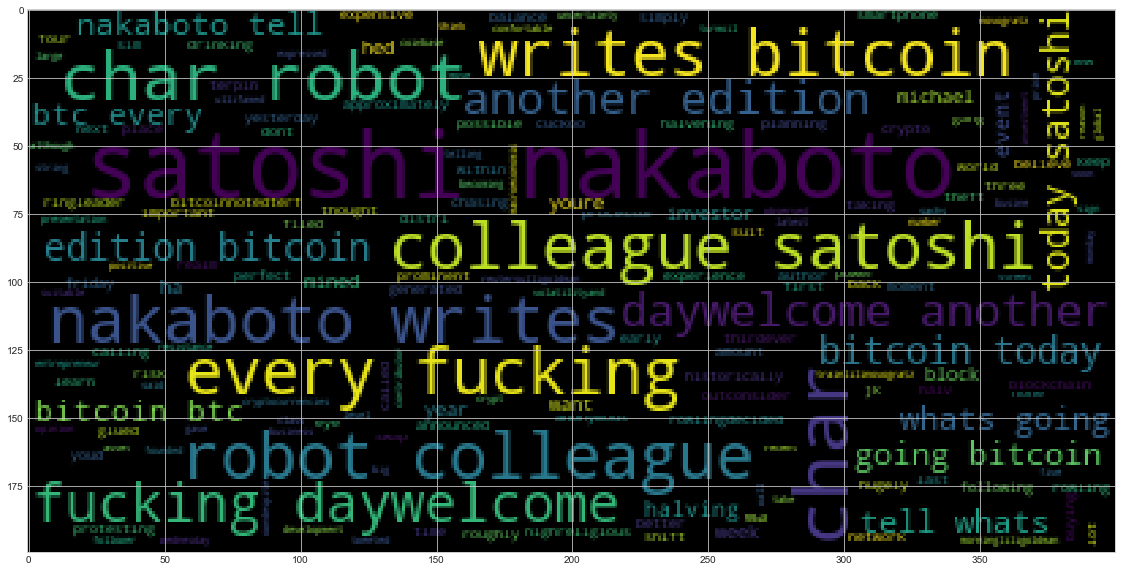

In [28]:
# Generate the Bitcoin word cloud

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(words_bit)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

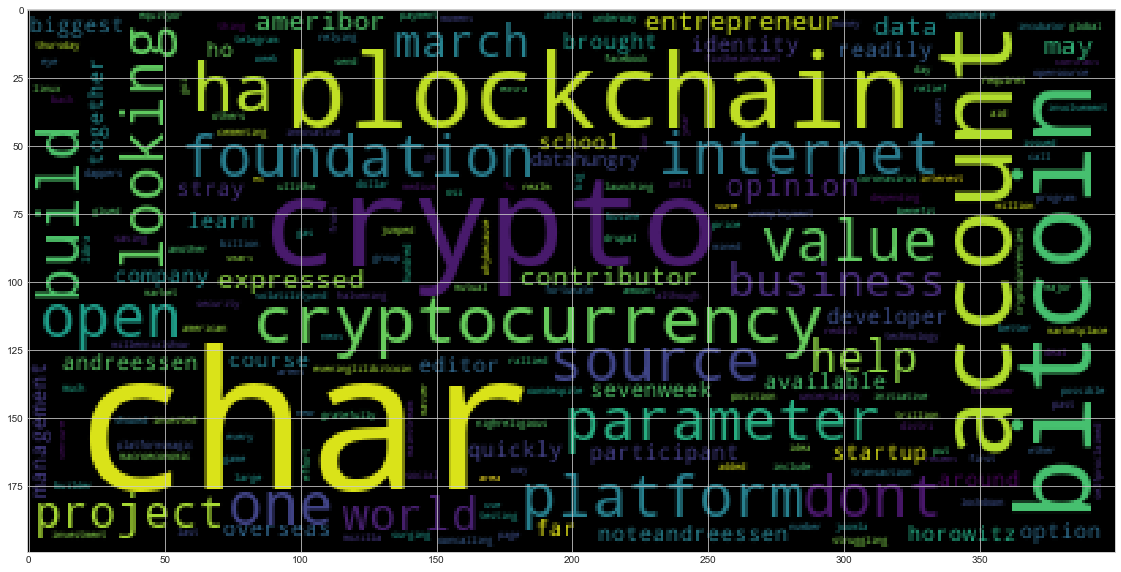

In [29]:
# Generate the Ethereum word cloud

big_string = ' '.join(words_eth)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [30]:
import spacy
from spacy import displacy

In [31]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [33]:
# Concatenate all of the bitcoin text together
all_articles = str(all_articles)
print(all_articles)



["J.K. Rowling has been drinking a lot and you'd better believe she has some thoughts on Bitcoin.\r\nNotedTERF and author of The Cuckoos Calling, Rowlingdecided Friday was the perfect time to learn about… [+2124 chars]", 'Yesterday, the prominent bitcoin investor Michael Terpin announced that hed filed suit against the ringleader of a SIM swap gang that hed been chasing down since 2018, following the theft of roughly … [+2243 chars]', 'Early next week, Bitcoin is about to experience its third-ever halving, a hugely important event that could shift the balance of power within the network. Historically the event, also called the halv… [+7424 chars]', 'Over the last few weeks all eyes in the crypto world have been glued to the halvening, a nigh-religious moment in the blockchain realm. Every once in a while, the amount of new bitcoin mined — distri… [+4849 chars]', 'If youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want

In [34]:
# Run the NER processor on all of the text
doc = nlp(all_articles)

# Add a title to the document
doc.user_data["title"] = "BITCOIN ARTICLES AND NER "   

In [35]:
# Render the visualization

displacy.render(doc, style='ent')

In [36]:
# List all Entities
print([ent.text for ent in doc.ents ])

['J.K. Rowling', 'The Cuckoos Calling', 'Friday', 'Yesterday', 'Michael Terpin', 'SIM', '2018', 'Early next week', 'Bitcoin', 'third', 'the last few weeks', 'blockchain', 'new bitcoin', 'first', 'Bitcoin', '2009', 'three', '210,000', 'every four years', 'Bitcoin', '$13 billion', 'the past day', 'bitcoin', 'more than 6%', 'Thursday', 'Bitcoin', 'more than 100%', 'March 16', 'None', 'Goldman Sachs', 'five', 'bitcoin', 'Wednesday', 'Goldman', 'Michael Novogratz', 'Monday', 'bitcoin', '$10,000 resistance', 'Novogratz', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'bitcoin', '2012', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'own.\\r\\nDespite', '2020', 'a big year', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoi

---

## Ethereum NER

In [37]:
# Concatenate all of the ethereum text together
all_articles_eth = str(all_articles_eth)
print(all_articles_eth)

['Editors note:Andreessen Horowitzs Crypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+2503 chars]', 'For developers looking to quickly build identity management into their platforms, the most readily available options don’t stray far from the internet’s biggest, most data-hungry platforms.\r\nMagic, a… [+2450 chars]', 'Use this to send Ether from one account to another or a smart contract address. It requires a few parameters depending on the transaction. Possible parameters include from, to, value, gas, and more.\r… [+206 chars]', "Some open-source groups, such as The Linux Foundation, can deal with it. Others aren't so fortunate. Some, such as Drupal Foundation, the Open Source Initiative (OSI), Open Source Matters (Joomla), a… [+1202 chars]", 'With unemployment surging and businesses struggling under lockdown, millions of Americans are relying on the extra benefits 

In [38]:
# Run the NER processor on all of the text

doc = nlp(all_articles_eth)

# Add a title to the document
doc.user_data["title"] = "ETHEREUM ARTICLES AND NER"



In [39]:
# Render the visualization

displacy.render(doc, style='ent')

In [40]:
# List all Entities
print([ent.text for ent in doc.ents ])

['Andreessen Horowitzs', 'Crypto Startup School', '45', 'U.S.', 'seven-week', 'Andreessen Ho', 'Ether', 'more.\\r', 'The Linux Foundation', 'Drupal Foundation', 'OSI', 'millions', 'Americans', '$2 trillion dollar', 'Relief', 'Ec', 'the last few weeks', 'blockchain', 'new bitcoin', 'crypto', 'Dapper', 'Libra', 'March', '1500', 'well over a hundred', 'the Mozilla Builders Incubator', '$13 billion', 'the past day', 'bitcoin', 'more than 6%', 'Thursday', 'Bitcoin', 'more than 100%', 'March 16', 'Blockchain', 'first', 'blockchain', 'millennials:\\xa0How', 'equity\\xa0or', 'own.\\r\\nDespite', '2020', 'a big year', 'Bitcoin', 'After Facebook and Telegram, Reddit', 'Java', 'Federal Reserve Board', 'Jerome H. Powell', 'May 28, 2020', 'one', 'Japanese', 'Tuesday']
